### Nodal tides

In [14]:
import numpy as np
import pandas as pd

In [27]:
path_slb = '/Users/dewilebars/Projects/SLBudget/outputs/'

In [21]:
# This functions was adapted from a Matlab function provided by Tim on June 16, 2020.
def nodal_tides_potential(lat, years):
    h2 = 0.6032
    k2 = 0.298

    #nodal cycle correction
    A = 0.44*(1+k2-h2)*20*(3*np.sin(lat*np.pi/180.)**2-1)/10  # mm to cm
    nodcyc = A*np.cos((2*np.pi*(years-1922.7))/18.61 + np.pi)
    
    nodcyc_df = pd.DataFrame(data={'Year': years, 'nodcyc': nodcyc})
    nodcyc_df = nodcyc_df.set_index('Year')
    return nodcyc_df

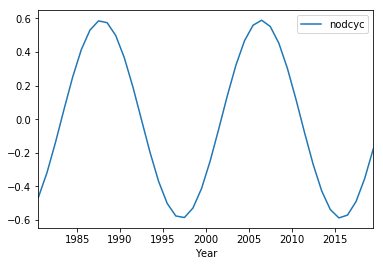

In [26]:
years = np.arange(1980,2020)+0.5
nodal_tides = nodal_tides_potential(54, years)
nodal_tides.plot()

The results seem to be in accordence with Frederikse et al. 2016 Figure 4.

In [38]:
budget_NCEP1_df = pd.read_csv(path_slb+
                        'slbudget_2020_04_28_NS_Fred16_1950_2018_NCEP1.csv')
budget_NCEP1_df = budget_NCEP1_df.set_index('time')

,Total,Steric,GIA,Glaciers,Antarctica,Greenland,TWS,Nodal,Wind,Pressure,Obs
time,,,,,,,,,,,
1950,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1951,-5.482610,-4.628362,0.00525,0.029856,0.000000,0.000000,0.166306,-0.445357,-0.970087,0.359783,-2.200000
1952,-7.266720,-7.357800,0.01050,0.063361,0.000000,0.000000,0.221953,-0.931983,1.077662,-0.350412,-0.890000
1953,-4.265964,-0.097683,0.01575,0.112087,0.000000,0.000000,0.176144,-1.404951,0.356672,-3.423982,-2.130000
1954,-1.790896,-0.858887,0.02100,0.151206,0.000000,0.000000,0.127677,-1.810873,0.509196,0.069785,-1.510000
1955,-4.608091,-1.562665,0.02625,0.162019,0.000000,0.000000,-0.011787,-2.103932,0.350071,-1.468047,-1.040000
1956,-5.052112,0.055587,0.03150,0.193870,0.000000,0.000000,-0.173402,-2.251048,-0.233749,-2.674869,-5.646744
1957,-3.028090,0.008911,0.03675,0.258522,0.000000,0.000000,-0.081809,-2.235616,0.553450,-1.568298,-2.581183
1958,-6.632136,-3.381402,0.04200,0.313592,0.000000,0.000000,0.026513,-2.059377,-0.655780,-0.917682,-2.918683


In [36]:
# Compare with nodal cycle computed from the regression method
budget_df = pd.read_csv(path_slb+
                        'slbudget_2020_06_15_ZSM_1979_2018_ERA5.csv')
budget_df = budget_df.set_index('time')

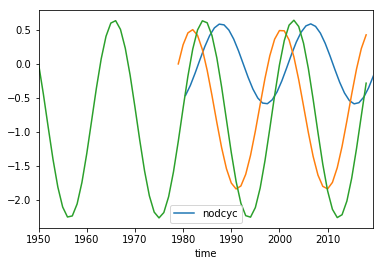

In [39]:
nodal_tides.plot()
budget_df.Nodal.plot(label='regression')
budget_NCEP1_df.Nodal.plot()

The estimation of the nodal tide from a regression doesn't work for this short time series

Is it converging over longer time scales?